# K Nearest Neighbors Project 

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data
**Let's start by reading the 'KNN_Project_Data csv file into a dataframe**

In [2]:
knn_data = pd.read_csv('/Users/vinay/Downloads/KNN_Project_Data')

In [3]:
knn_data.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

**Using seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

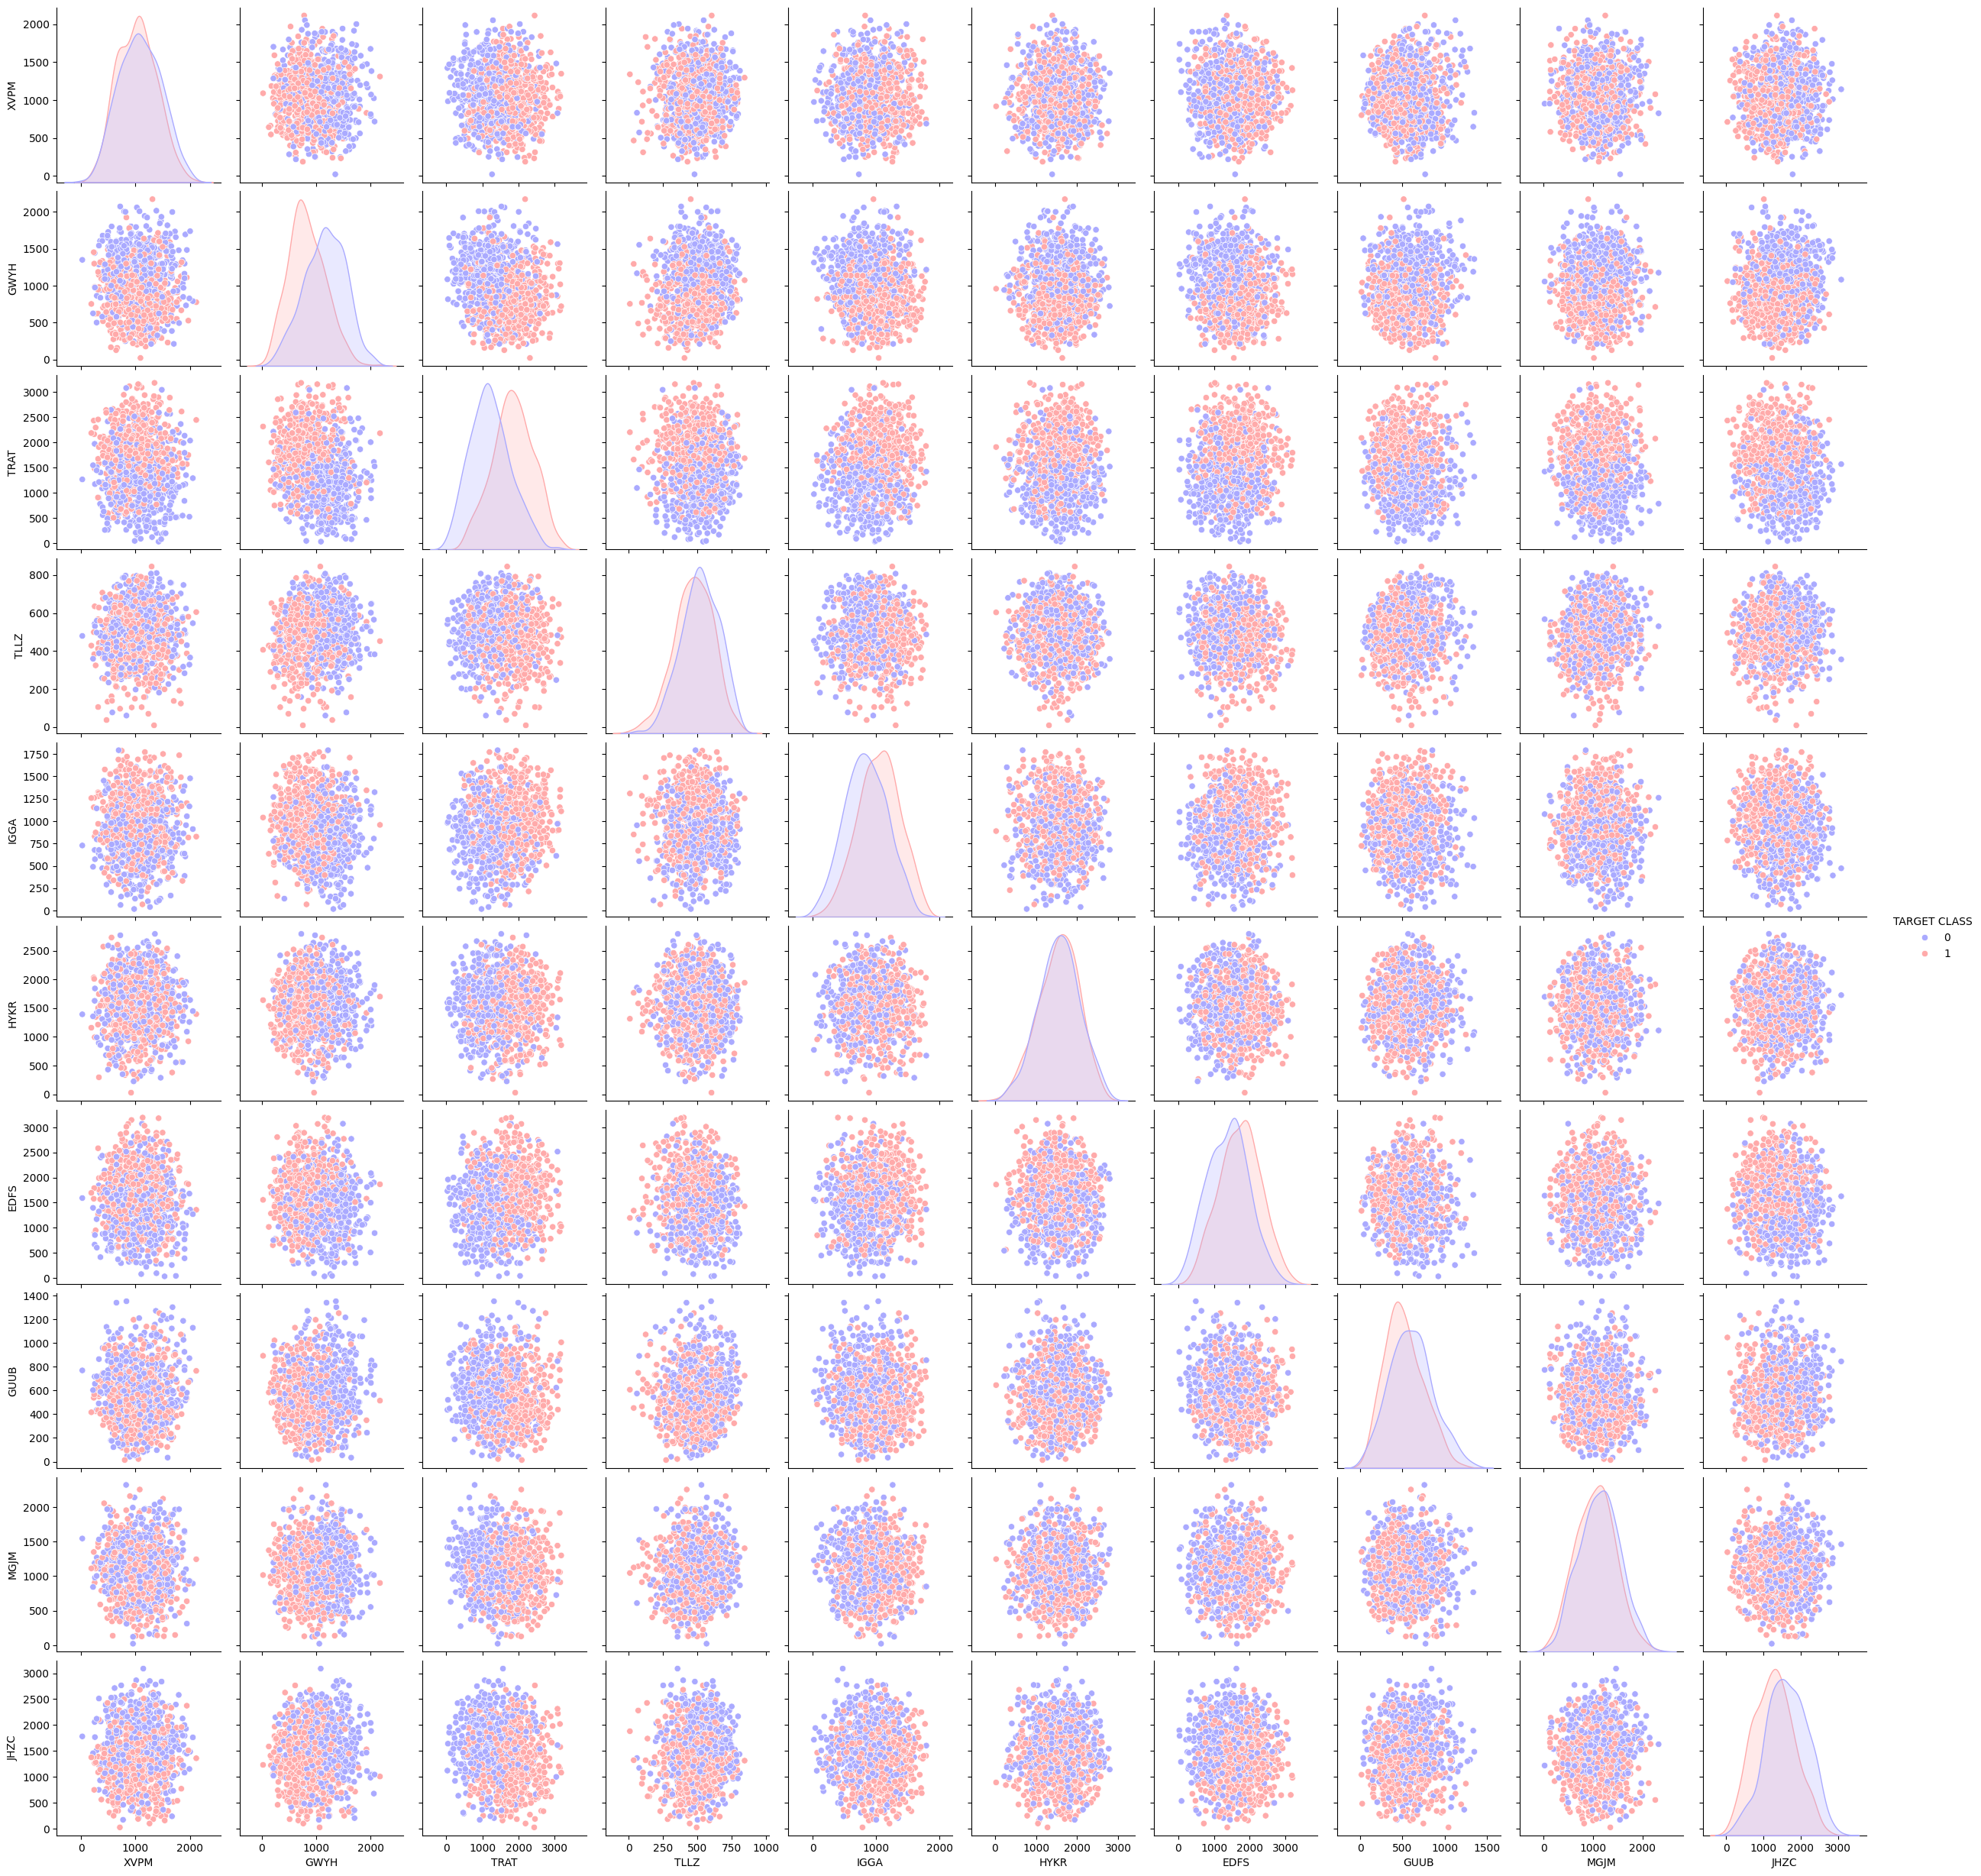

In [13]:
sns.pairplot(knn_data, hue = 'TARGET CLASS', palette = 'bwr')
plt.show()

# Standardizing the Variables

Time to standardize the variables.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [19]:
scaler.fit(knn_data.drop('TARGET CLASS',axis = 1))

StandardScaler()

**Using the .transform() method to transform the features to a scaled version.**

In [26]:
scaled_features = scaler.transform(knn_data.drop('TARGET CLASS',axis = 1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]], shape=(1000, 10))

**Converting the scaled features to a dataframe and checking the head of this dataframe to make sure the scaling worked.**

In [25]:
knn_scaled = pd.DataFrame(scaled_features, columns = knn_data.columns[:-1])
knn_scaled.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X = knn_scaled[['XVPM',	'GWYH',	'TRAT',	'TLLZ',	'IGGA',	'HYKR',	'EDFS',	'GUUB',	'MGJM',	'JHZC']]
y = knn_data['TARGET CLASS']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model instance with n_neighbors=1**

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fitting this KNN model to the training data.**

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Using the predict method to predict values using your KNN model and X_test.**

In [40]:
prediction = knn.predict(X_test)

** Let's create a confusion matrix and classification report.**

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(confusion_matrix(y_test, prediction))

[[109  43]
 [ 41 107]]


In [46]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Creating a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [48]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now creating the plot using the information from the for loop.**

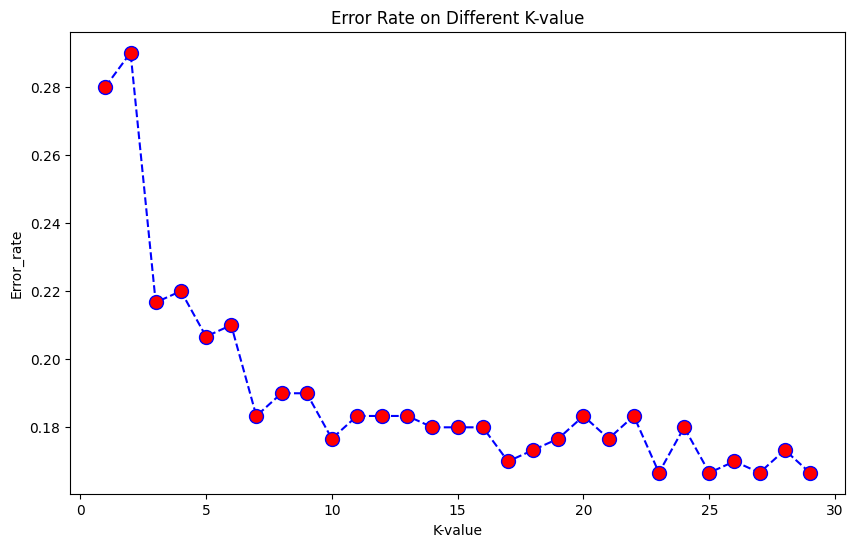

In [54]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30),error_rate,marker = 'o' ,linestyle = '--', color = 'blue',markerfacecolor = 'red',markersize = 10)
plt.title('Error Rate on Different K-value')
plt.xlabel('K-value')
plt.ylabel('Error_rate')
plt.show()

## Retrain with new K Value

**Retraining the model with the best K value and redoing the classification report and the confusion matrix.**

In [59]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[124  28]
 [ 22 126]]


              precision    recall  f1-score   support

           0       0.85      0.82      0.83       152
           1       0.82      0.85      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



#### Our earlier model gave about 72% accuracy, but this KNN model is now hitting around 83%. That’s a solid improvement, and it’s performing consistently across both groups, which makes it a much stronger option overall.